In [1]:
import networkx as nx
import numpy as np
import pandas as pd

In [2]:
# for visualization
from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 
from scipy.sparse import csr_matrix

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):

    adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
    adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
    
    names = np.array(list(G.nodes))
    
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = np.array(names)
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency)

    if show_names:
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
    
    else:
        
        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width)
    
    return SVG(image)

In [3]:
G = nx.les_miserables_graph()
df = nx.to_pandas_edgelist(G)[['source', 'target']] # cut the weights, for visualization
G = nx.from_pandas_edgelist(df)

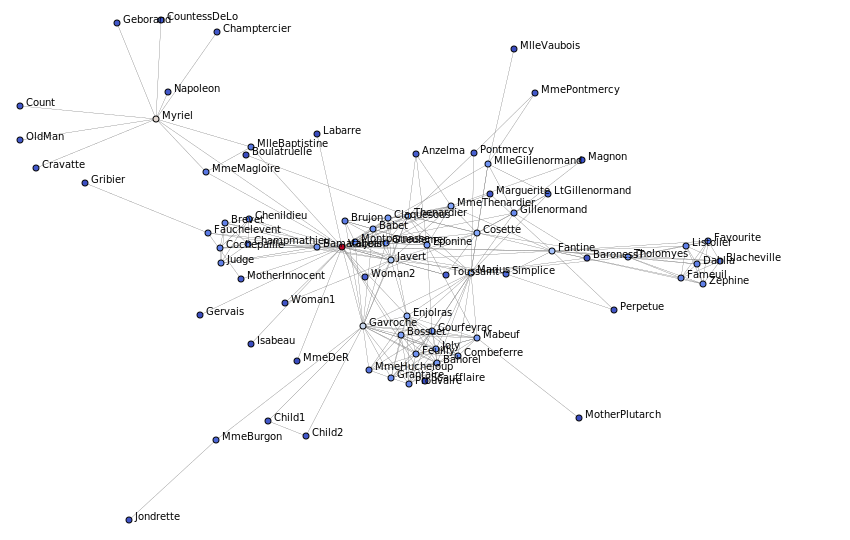

In [4]:
# this is the Les Miserables graph with names

draw_graph(G, node_size=3, show_names=True, edge_width=0.2)

# Egocentric Network Analysis

In this notebook, I am going to show you how to "zoom in" on any node in the network. Scroll up and try to identify all of Claquesous's connections. It's very difficult to do, because he is part of a denser area in the network. For this, we need to be able to look closer.

The best first option for looking closer is to look at a node's Ego Graph. In an Ego Graph, the node of interest (Claquesous) is in the center, known as the ego node. All of the node's connections are shown as connections around the ego node, and they are known as alters. The two things to keep in mind: ego and alters. The ego is in the center, the alters are around it.

A very cool thing that can happen in an Ego Graph is that you will also be able to see alters' connections to other alters. Rather than an Ego Graph simply being a star, sometimes there are other connections that can be interesting. In those cases, you can look closer with your eyes, or you can take another approach, which I do often: drop the center, and the alters will show as isolates and small groups.

I will attempt to show all of this in this notebook. First, let's use PageRank to identify the most important nodes in this network.

# PageRank - Identify Nodes of Interest

In [5]:
page_rank = nx.pagerank(G)

pr_df = pd.DataFrame().from_dict(page_rank, orient='index')
pr_df.columns = ['page_rank']
pr_df.sort_values('page_rank', ascending=False, inplace=True)
pr_df.head(10)

,page_rank
Valjean,0.075434
Myriel,0.042803
Gavroche,0.035764
Marius,0.030893
Javert,0.030303
Thenardier,0.027926
Fantine,0.027022
Enjolras,0.021880
Cosette,0.020611
MmeThenardier,0.019501


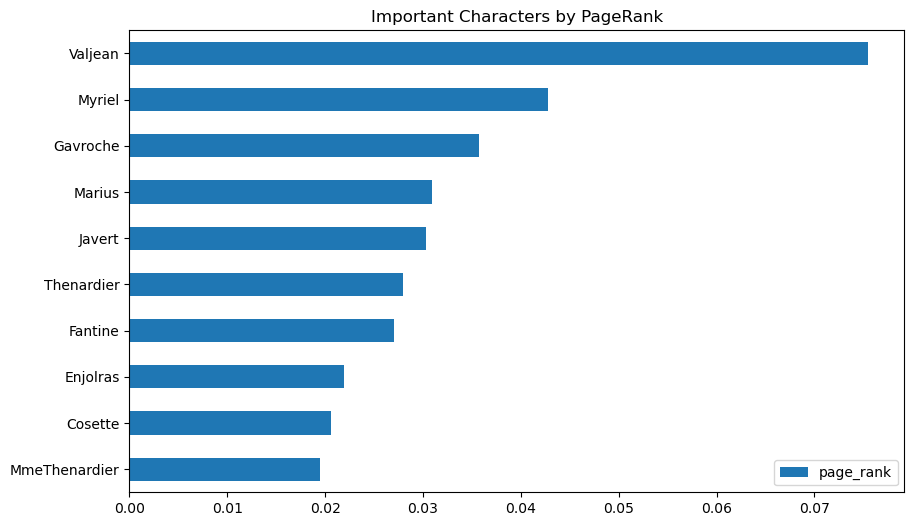

In [6]:
title = 'Important Characters by PageRank'

pr_df.head(10).plot.barh(figsize=(10,6), title=title).invert_yaxis()

# Egocentric Network Analysis
Next, let's look at the Ego Graphs for each of the top ten characters found by PageRank. Before visualizing and inspecting the Ego Graphs, let's create a Python list so that we can more easily look through them without explicitely typing their names.

In [7]:
top_nodes = pr_df.head(10).index.values

In [8]:
top_nodes[0]

'Valjean'

Now we are all set to start looking through them, in order of importance.

## #1: Valjean

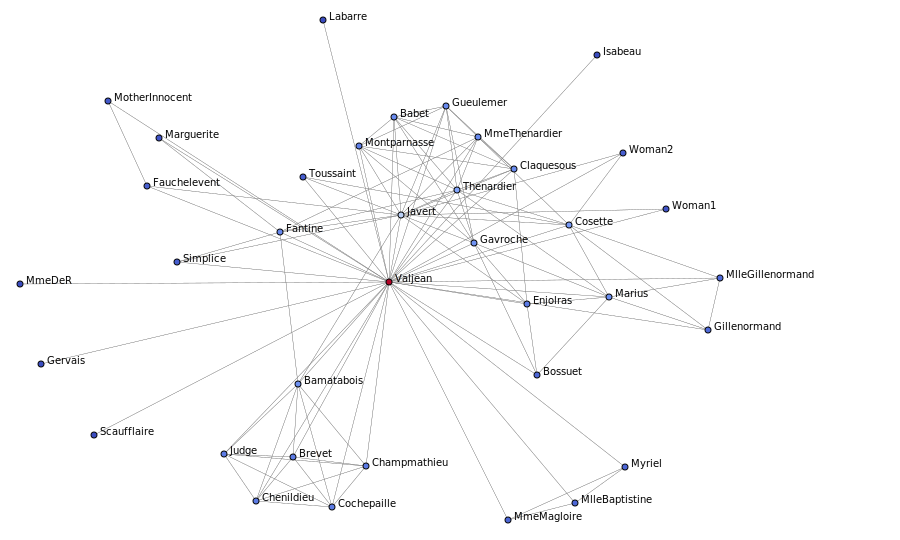

In [9]:
ego = top_nodes[0]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

Valjean has a very interesting network, as it is not a simple star network. In a star network, there will be one center node and two or more outside nodes. None of the outside nodes will link to each other in a star network. This is NOT a star network. This has more complexity.

In a network with complexity, where there are side links like we can see between Judge and Chenildieu, and many others, it can be useful to DROP the center, which will remove the EGO node from the graph. By doing so, we can identify the various subgroups that exist in the Ego Graph.

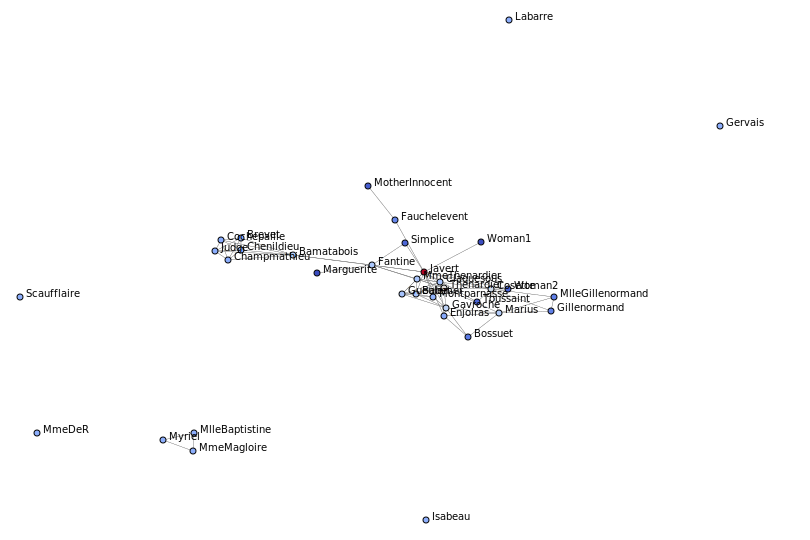

In [10]:
ego = top_nodes[0]

G_ego = nx.ego_graph(G, ego, center=False)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

## #2: Myriel

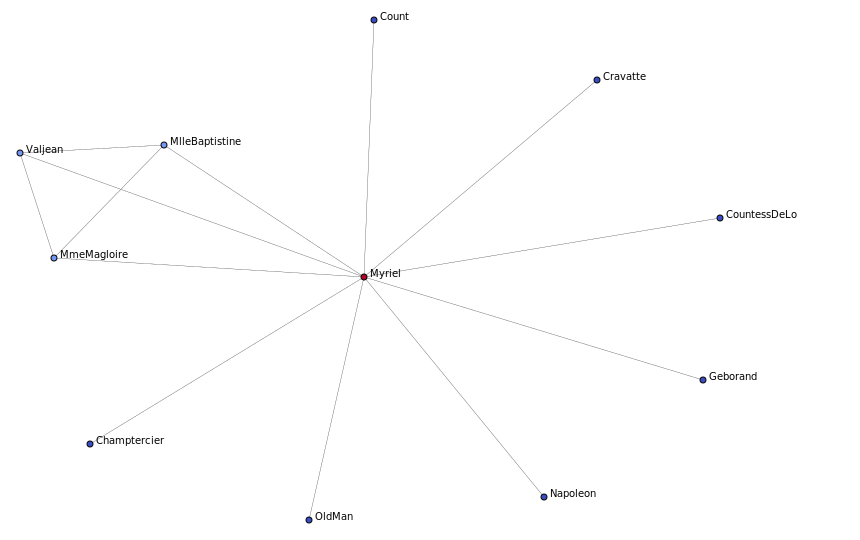

In [11]:
ego = top_nodes[1]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

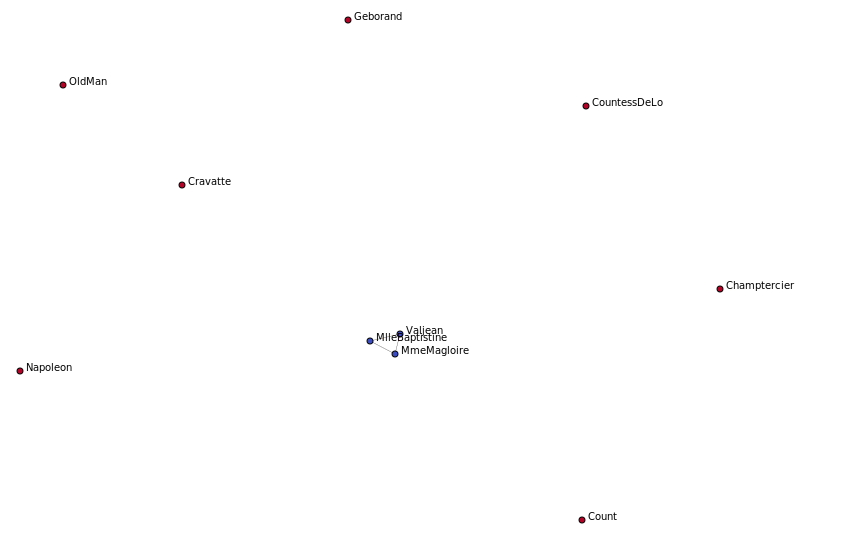

In [12]:
ego = top_nodes[1]

G_ego = nx.ego_graph(G, ego, center=False)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

## #3: Gavroche

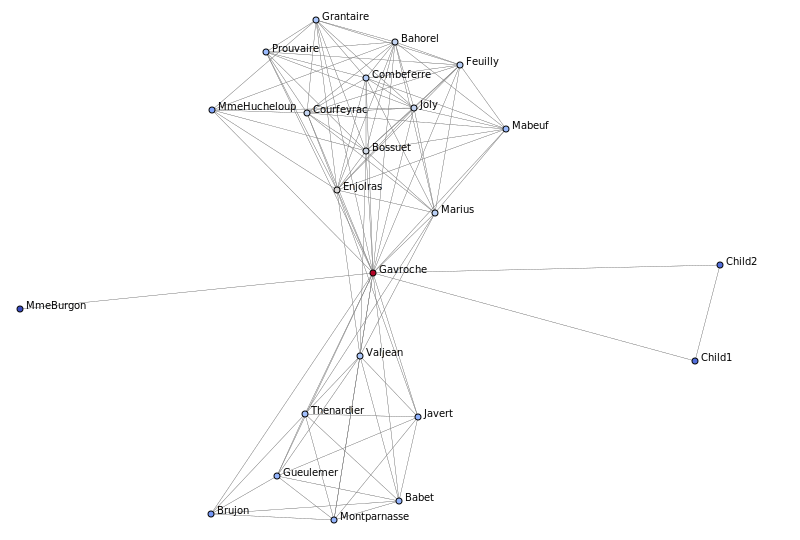

In [13]:
ego = top_nodes[2]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

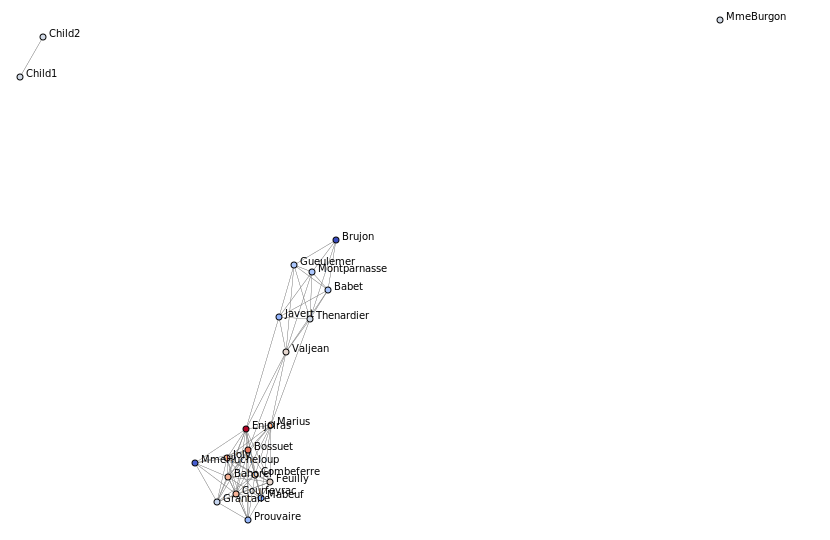

In [14]:
ego = top_nodes[2]

G_ego = nx.ego_graph(G, ego, center=False)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

## #4: Marius

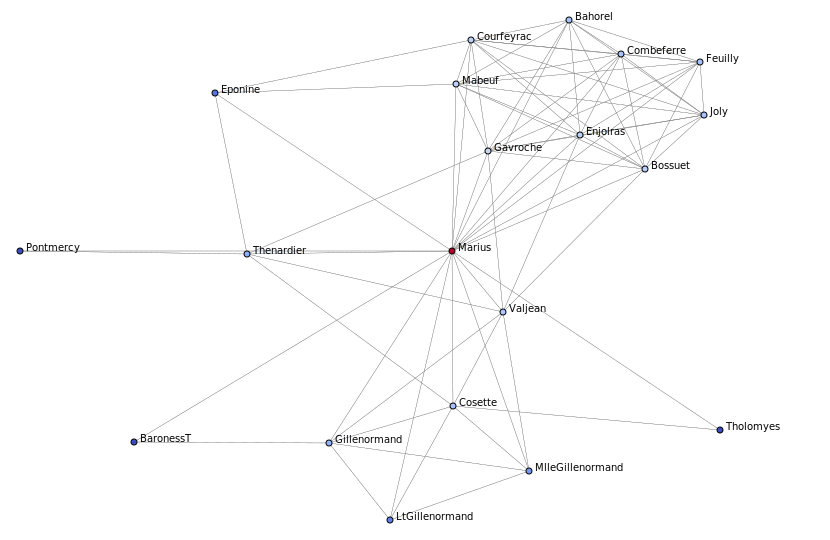

In [15]:
ego = top_nodes[3]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

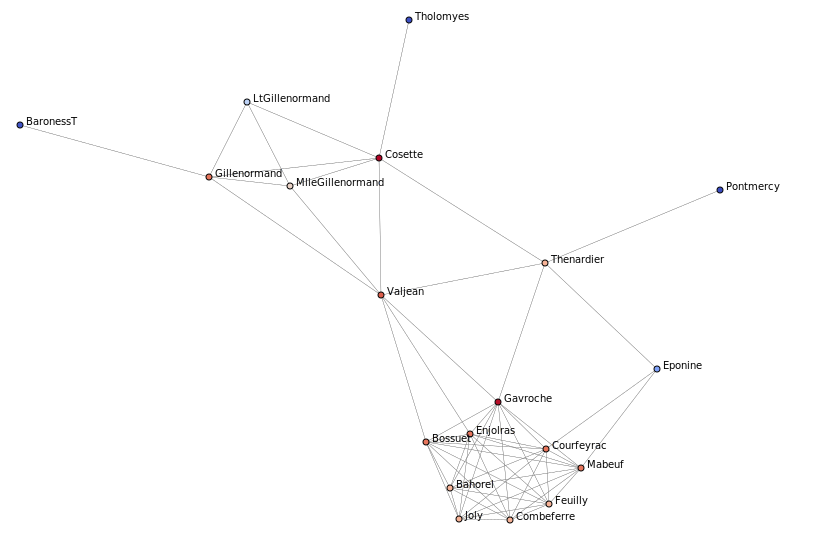

In [16]:
ego = top_nodes[3]

G_ego = nx.ego_graph(G, ego, center=False)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

## #5: Javert

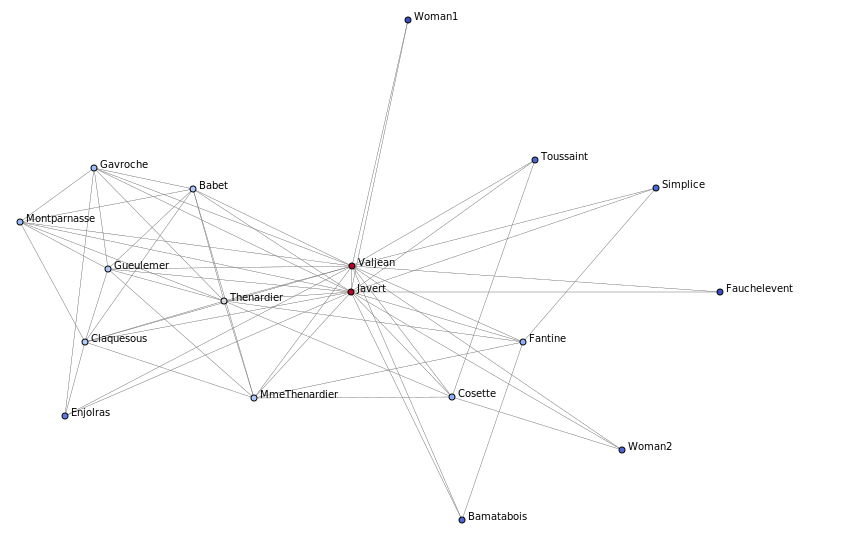

In [17]:
ego = top_nodes[4]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

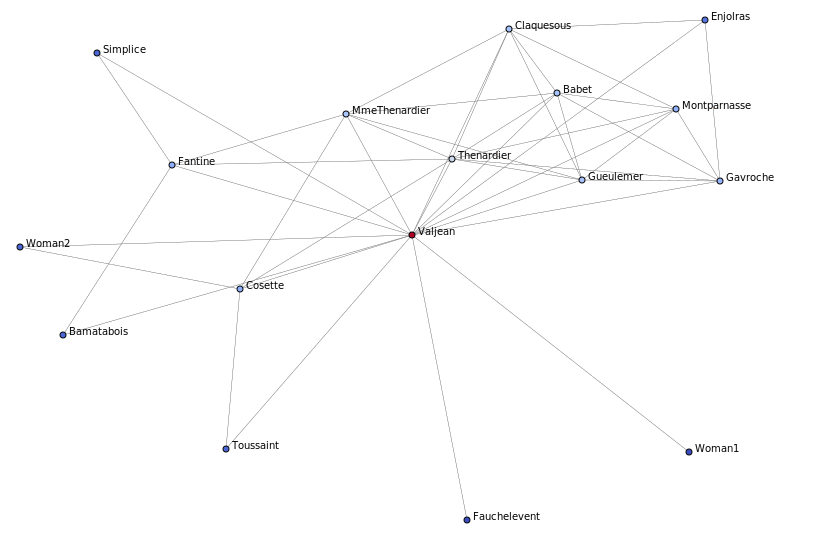

In [18]:
ego = top_nodes[4]

G_ego = nx.ego_graph(G, ego, center=False)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)